In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# pclass, sex, age, fare, survived(target)

wanted_columns = ['pclass', 'sex', 'age', 'fare', 'survived']

titanic_for_model = titanic[wanted_columns]
titanic_for_model.head()

,pclass,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [4]:
titanic_for_model.isna().sum()

pclass        0
sex           0
age         177
fare          0
survived      0
dtype: int64

In [5]:
len(titanic_for_model)

891

In [6]:
titanic_for_model = titanic_for_model.dropna()
len(titanic_for_model) # new length after removing rows with missing values

714

In [7]:
mapping = {
    'male': 0,
    'female': 1
}
titanic_for_model['sex'] = titanic_for_model['sex'].map(mapping)

In [8]:
titanic_for_model.head()

,pclass,sex,age,fare,survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


In [9]:
from sklearn.model_selection import train_test_split

x_columns = ['pclass', 'sex', 'age', 'fare']
y_column = ['survived']

X = titanic_for_model[x_columns]
y = titanic_for_model[y_column]


In [10]:
X[:3] # training and test X data

,pclass,sex,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250


In [11]:
y[:3] # training and test target

,survived
0,0
1,1
2,1


In [12]:
# Split the data into a training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, # the whole data used for training and predicting
    y, # what we want to predict
    test_size=0.2, # 20% of the data is going to the testing
    random_state=42, # random number, for consistent randomization 
    stratify=y 
    # make the train and test splits have the same ratio for the survival/y column (train(30%survived,70%died), test(30%survived,70%died))
)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train) # training of the model

/opt/homebrew/Cellar/jupyterlab/4.5.0_1/libexec/lib/python3.14/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
y_predicted = model.predict(X_test) # predict on unseen data
y_predicted

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### Feature Scaling

In [15]:
X.describe().loc[['min','max','mean','std']]

,pclass,sex,age,fare
min,1.000000,0.000000,0.420000,0.000000
max,3.000000,1.000000,80.000000,512.329200
mean,2.236695,0.365546,29.699118,34.694514
std,0.838250,0.481921,14.526497,52.918930


In [16]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# fit learns the statistics from the data: 
## - "What's the average age?" -> stores mean age = 30
## - "What's the std of age?" -> stores mean age = 15

In [17]:
X_train_scaled # buttom line: now all features will be treated equally by the model

array([[-0.28661715, -0.75125466, -0.23018928, -0.44856585],
       [ 0.90796966, -0.75125466, -0.64463958, -0.34720778],
       [-0.28661715, -0.75125466, -0.57556453,  0.76965699],
       ...,
       [ 0.90796966,  1.33110655, -1.40446513, -0.35679693],
       [ 0.90796966, -0.75125466, -0.05750165, -0.34027938],
       [ 0.90796966, -0.75125466, -0.16111423, -0.48409735]],
      shape=(571, 4))

In [18]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

In [19]:
X_train_scaled_df

,pclass,sex,age,fare
0,-0.286617,-0.751255,-0.230189,-0.448566
1,0.907970,-0.751255,-0.644640,-0.347208
2,-0.286617,-0.751255,-0.575565,0.769657
3,-1.481204,-0.751255,1.082237,0.034856
4,-1.481204,1.331107,1.703912,0.497007
...,...,...,...,...
566,-0.286617,-0.751255,-1.818915,-0.148844
567,-1.481204,-0.751255,0.391486,-0.138209
568,0.907970,1.331107,-1.404465,-0.356797
569,0.907970,-0.751255,-0.057502,-0.340279


In [20]:
X_train_scaled_df.describe().loc[['min','max','mean','std']]

,pclass,sex,age,fare
min,-1.481204e+00,-7.512547e-01,-1.974334e+00,-6.516030e-01
max,9.079697e-01,1.331107e+00,3.499863e+00,9.255240e+00
mean,6.221915e-17,7.155203e-17,-2.239890e-16,-1.073280e-16
std,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00


### Comparing Model with Scaled vs Not Scaled data

In [21]:
model_no_scale = LogisticRegression(max_iter=100)
model_no_scale.fit(X_train, y_train) # not scaled data
prediction_no_scale = model_no_scale.predict(X_test)

/opt/homebrew/Cellar/jupyterlab/4.5.0_1/libexec/lib/python3.14/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
model_scaled = LogisticRegression(max_iter=100)
model_scaled.fit(X_train_scaled, y_train)
prediction_scaled = model_scaled.predict(X_test_scaled)

/opt/homebrew/Cellar/jupyterlab/4.5.0_1/libexec/lib/python3.14/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
y_test_flat = y_test.values.flatten() # converts [[1], [0], [1]] -> [1, 0, 1]

In [24]:
(prediction_no_scale == y_test_flat).sum()

np.int64(115)

In [25]:
(prediction_scaled == y_test_flat).sum()

np.int64(113)

In [26]:
for feature, weight in zip(X.columns, model_no_scale.coef_[0]):
    print(f" {feature}: {weight}")

 pclass: -1.256361657391645
 sex: 2.359401001996991
 age: -0.03744311627514506
 fare: -0.00010632804120316796


In [27]:
for feature, weight in zip(X.columns, model_scaled.coef_[0]): # coefficients = weights
    print(f" {feature}: {weight}")

 pclass: -1.0699023633914535
 sex: 1.1794203774804912
 age: -0.5402191434253258
 fare: -0.013022434082958579


### Logistic Refression Deep Dive

In [28]:
np.random.seed(42)

number_of_samples = 200 # number of rows. sample = row in a dataframe

# Admitted students (score well on both exams)
admitted_exam1 = np.random.normal(70, 10, number_of_samples // 2)
admitted_exam2 = np.random.normal(70, 10, number_of_samples // 2)

# Rejected students (lower scores)
rejected_exam1 = np.random.normal(45, 10, number_of_samples // 2)
rejected_exam2 = np.random.normal(45, 10, number_of_samples // 2)

exam1 = np.concatenate([admitted_exam1, rejected_exam1])
exam2 = np.concatenate([admitted_exam2, rejected_exam2])

admitted = np.concatenate([np.ones(number_of_samples//2), np.zeros(number_of_samples//2)])

admission_dataframe = pd.DataFrame({
    'exam1': exam1,
    'exam2': exam2,
    'admitted': admitted.astype(int)
})

In [81]:
admission_dataframe.head()

,exam1,exam2,admitted
0,74.967142,55.846293,1
1,68.617357,65.793547,1
2,76.476885,66.572855,1
3,85.230299,61.977227,1
4,67.658466,68.387143,1


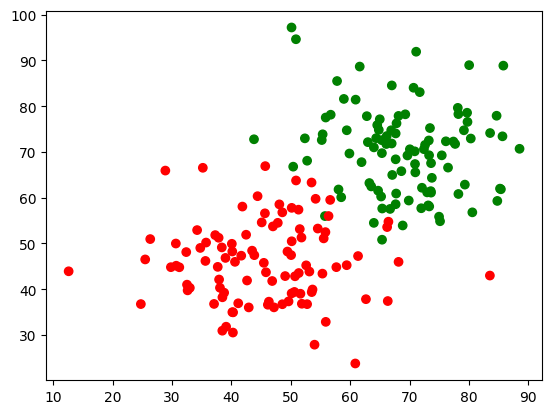

In [29]:
colors = ['red' if admitted == 0 else 'green' for admitted in admission_dataframe['admitted']]
plt.scatter(admission_dataframe['exam1'], admission_dataframe['exam2'], c=colors)

In [30]:
feature_columns = ['exam1','exam2']
X_admission = admission_dataframe[feature_columns]

target_column = ['admitted']
y_admission = admission_dataframe[target_column]

In [31]:
X_train_admission, X_test_admission, y_train_admission, y_test_admission = train_test_split(
    X_admission,
    y_admission,
    test_size=0.2, 
    random_state=42,
    stratify=y_admission
)

In [32]:
scaler_admission = StandardScaler()
X_train_admission_scaled = scaler_admission.fit_transform(X_train_admission)
X_test_admission_scaled = scaler_admission.transform(X_test_admission)

In [33]:
model_admission = LogisticRegression(max_iter=1000)
model_admission.fit(X_train_admission_scaled, y_train_admission)

y_prediction_admission = model_admission.predict(X_test_admission_scaled)

/opt/homebrew/Cellar/jupyterlab/4.5.0_1/libexec/lib/python3.14/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
y_prediction_admission

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [35]:
y_test_admission_flat = y_test_admission.values.flatten()
y_test_admission_flat

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [36]:
correct = (y_prediction_admission == y_test_admission_flat).sum()
correct

np.int64(38)

In [37]:
model_admission.coef_ # the weights are similar

array([[2.21201388, 2.85470309]])

### Visualize the Decision Boundary 

In [38]:
def plot_decision_boundary(model, X, y, scaler=None):

    x_min, x_max = X.iloc[:, 0].min() - 5, X.iloc[:, 0].max() + 5
    y_min, y_max = X.iloc[:, 1].min() - 5, X.iloc[:, 1].max() + 5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    # [[1,2],[3,5]] -> [1,2,3,4]
    grid_points = np.column_stack([xx.flatten(), yy.flatten()])

    if scaler is not None: 
        grid_points = scaler.transform(grid_points)

    Z = model.predict(grid_points) # get predictions for all grid points
    Z = Z.reshape(xx.shape) #  Reshape back to grid 

    # Plot with contourf(x,y,z) Colors the regions based predictions
    plt.contourf(xx, yy, Z)

    colors = ['red' if label == 0 else 'green' for label in y]
    plt.scatter(X.iloc[:, 0], X.iloc[:,1], c=colors)

    plt.show()

/opt/homebrew/Cellar/jupyterlab/4.5.0_1/libexec/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


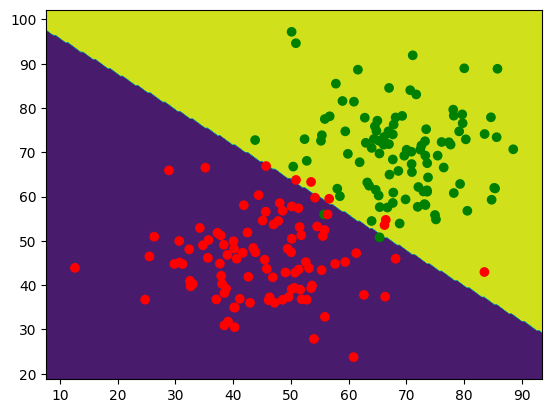

In [39]:
plot_decision_boundary(model_admission, X_admission, y_admission.values, scaler_admission)

### Evaluation Metrics

In [47]:
#Accuracy, Precision, Recall, F1(Precision+Recall)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    classification_report
)

In [41]:
# evaluate admission model 
accuracy_score(y_test_admission, y_prediction_admission)

0.95

In [43]:
matrix = confusion_matrix(y_test_admission, y_prediction_admission)

true_negative = matrix[0,0]  # TN
true_positive = matrix[1,1] # TP

false_negative = matrix[1,0] # FN
false_positive =  matrix[0,1] # FP

print(f"true negative: {true_negative}")
print(f"true positive: {true_positive}")
print(f"false negative: {false_negative}")
print(f"false positive: {false_positive}")


true negative: 18
true positive: 20
false negative: 0
false positive: 2


In [44]:
precision_score(y_test_admission, y_prediction_admission)

0.9090909090909091

In [45]:
recall_score(y_test_admission, y_prediction_admission)

1.0

## Decision Boundary: Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3)

decision_tree.fit(X_train_admission, y_train_admission)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


/opt/homebrew/Cellar/jupyterlab/4.5.0_1/libexec/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


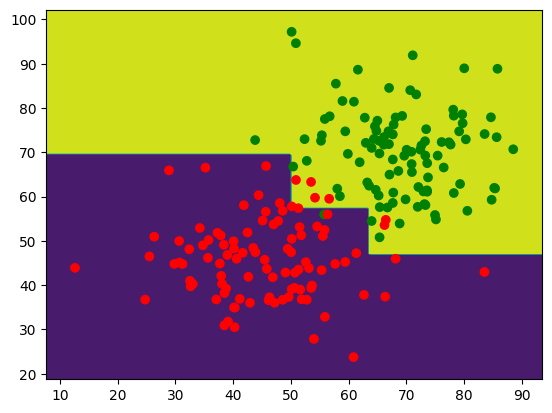

In [66]:
plot_decision_boundary(decision_tree, X_admission, y_admission.values, None)

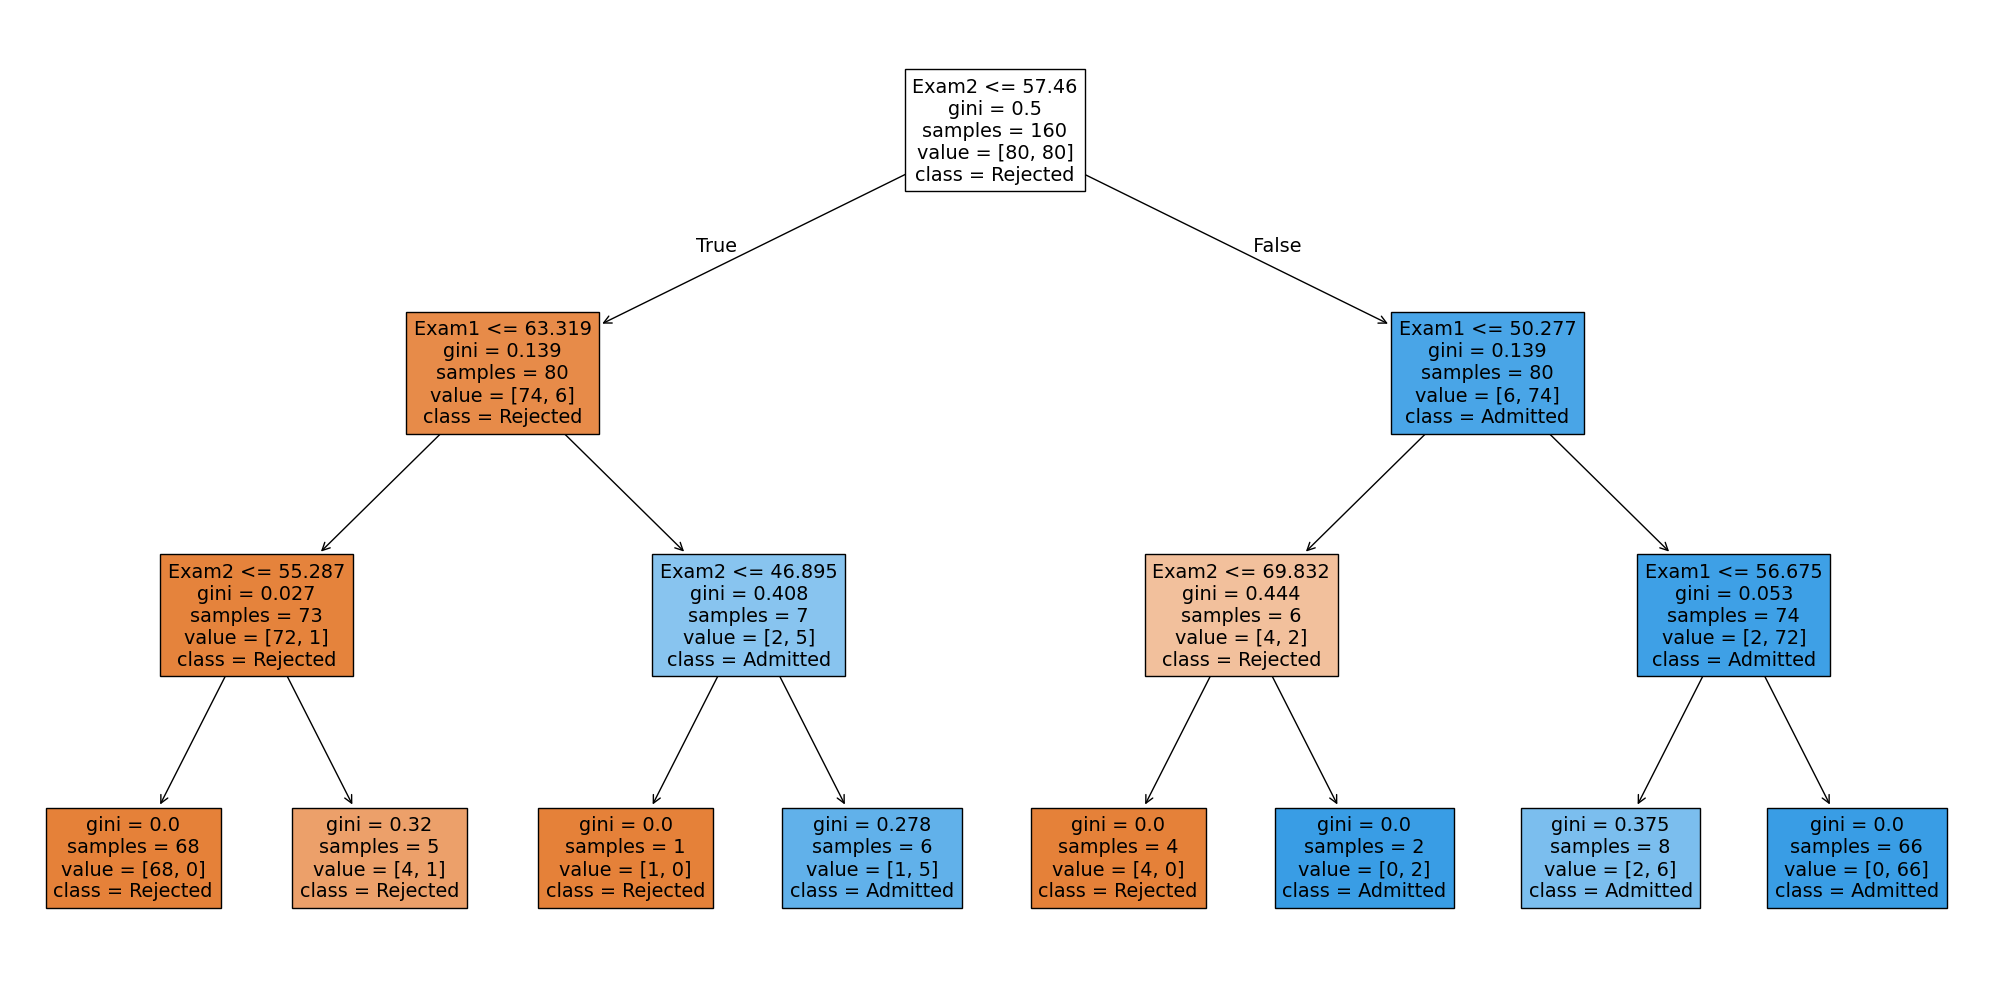

In [67]:
from sklearn.tree import plot_tree, export_text

features_names = ['Exam1', 'Exam2']
class_names = ['Rejected', 'Admitted']

plt.figure(figsize=(20,10))

plot_tree(
    decision_tree,
    feature_names = features_names,
    class_names = class_names,
    filled=True, # Color the nodes by class
)
plt.tight_layout()

## Decision Boundary: Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)

random_forest.fit(X_train_admission_scaled, y_train_admission)

/opt/homebrew/Cellar/jupyterlab/4.5.0_1/libexec/lib/python3.14/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,50
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


/opt/homebrew/Cellar/jupyterlab/4.5.0_1/libexec/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


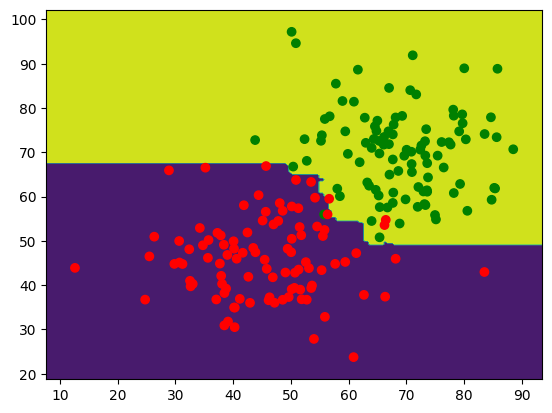

In [53]:
plot_decision_boundary(random_forest, X_admission, y_admission.values, scaler_admission)

In [58]:
print("LOGISTIC REGRESSION RESULTS:")
print(classification_report(y_test_admission,y_prediction_admission))

LOGISTIC REGRESSION RESULTS:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.91      1.00      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [59]:
decision_tree_prediction = decision_tree.predict(X_test_admission_scaled)
print("DECISION TREE RESULTS:")
print(classification_report(decision_tree_prediction,y_prediction_admission))

DECISION TREE RESULTS:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.95      0.88      0.91        24

    accuracy                           0.90        40
   macro avg       0.89      0.91      0.90        40
weighted avg       0.91      0.90      0.90        40



In [60]:
random_forest_prediction = random_forest.predict(X_test_admission_scaled)
print("RANDOM FOREST RESULTS:")
print(classification_report(random_forest_prediction,y_prediction_admission))

RANDOM FOREST RESULTS:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



### ROC Curve

<cell_type>markdown</cell_type>### Understanding the ROC Curve with Our Admission Data

**What does the ROC curve actually show?**

The ROC curve answers: **"At each threshold, what's my TPR (recall) vs my FPR (false alarm rate)?"**

---

**Our admission model results at threshold = 0.5:**

| Metric | Value | Meaning |
|--------|-------|---------|
| **Recall (TPR)** | 1.0 (100%) | We correctly admitted ALL 20 students who deserved it |
| **Precision** | 0.91 (91%) | Of 22 students we admitted, 20 were correct, **2 were mistakes** |
| **FPR** | 0.10 (10%) | We wrongly admitted 2 out of 20 rejected students |

---

### Wait — if Recall is perfect (100%), why isn't the ROC curve at the perfect corner?

**Great question!** This is the key insight:

- **Recall = 100%** means we caught all TRUE positives (good students) ✓
- **But FPR = 10%** means we ALSO caught some FALSE positives (bad students) ✗

The ROC curve point at threshold 0.5 is at **(FPR=0.10, TPR=1.0)** — not at (0, 1)!

```
         TPR
          ↑
     1.0  │  ★ ← Our model is HERE (0.10, 1.0)
          │    Not at the perfect corner (0, 1)
          │
     0.5  │
          │
     0.0  └────────────────→ FPR
          0    0.1   0.5   1.0
               ↑
          We have 10% false positives!
```

---

### Why ROC uses FPR (not Precision) on the X-axis

**Precision answers:** "Of students we ADMITTED, how many deserved it?" → 20/22 = 91%

**FPR answers:** "Of students who should be REJECTED, how many did we wrongly admit?" → 2/20 = 10%

Both measure false positives, but from different perspectives:

| Metric | Formula | Our value | Question |
|--------|---------|-----------|----------|
| Precision | TP / (TP + FP) | 20/22 = 91% | "How trustworthy are our admits?" |
| FPR | FP / (FP + TN) | 2/20 = 10% | "How badly did we fail the rejects?" |

**The ROC curve uses FPR because it measures performance on the NEGATIVE class specifically.**

---

### The Trade-off in Our Data

Even though classes are mostly separated, there's **some overlap** — a few rejected students have scores that look like admitted students. That's why:

- We can get TPR = 100% (catch all good students)
- But we pay a price: FPR = 10% (wrongly admit some bad students)

**To get FPR = 0%**, we'd need to raise the threshold, but then we might miss some good students (TPR < 100%).

In [69]:
X_test_admission_scaled

array([[-0.66512237, -1.03585146],
       [ 1.36784774,  0.9406526 ],
       [-0.09891001,  1.04298834],
       [ 1.07319728,  0.22020839],
       [-1.86356421,  0.52894805],
       [ 0.7199777 ,  0.68863679],
       [-0.33663553, -0.42016014],
       [ 0.72962394,  1.19880229],
       [ 0.75228021,  1.30344578],
       [-0.89042638, -0.60595025],
       [ 1.38714366,  0.90637021],
       [ 1.0498402 ,  0.89285183],
       [-0.41577798, -1.19065748],
       [ 1.12620466,  0.42607582],
       [-1.11771302, -0.50860253],
       [-0.9993245 ,  0.01881146],
       [ 1.90044778,  0.26432196],
       [ 0.62426434, -0.27150051],
       [-0.39743824,  0.38877938],
       [ 1.423853  ,  0.19715117],
       [-1.74576051, -0.50466156],
       [ 1.58010685, -0.06282988],
       [ 0.92093025,  1.70259773],
       [ 1.92787562,  2.01597056],
       [ 0.67538155,  0.91288934],
       [ 0.85208515,  0.74321155],
       [ 0.5657228 ,  0.7760066 ],
       [ 0.63150972, -1.31963373],
       [ 0.17139934,

In [80]:
# Get probabilities instead of class predictions
y_probabilities = model_admission.predict_proba(X_test_admission_scaled) # probabilities of classes

admitted_probabilities = y_probabilities[:,1]
for i in range(10):
    classified = "Admitted" if admitted_probabilities[i] >= 0.5 else 'Rejected'
    print(classified)


Rejected
Admitted
Admitted
Admitted
Rejected
Admitted
Rejected
Admitted
Admitted
Rejected


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    classification_report
)

In [90]:
model_admission # logistic regression model

thresholds = [0.3, 0.5, 0.7]

for threshold in thresholds:
    y_prediction_threshold = (admitted_probabilities >= threshold).astype(int)

    precision = precision_score(y_test_admission, y_prediction_threshold)
    recall = recall_score(y_test_admission, y_prediction_threshold)

    print(f"Threshold = {threshold}")
    print(f" Precision: {precision}")
    print(f" Recall: {recall}")

Threshold = 0.3
 Precision: 0.8333333333333334
 Recall: 1.0
Threshold = 0.5
 Precision: 0.9090909090909091
 Recall: 1.0
Threshold = 0.7
 Precision: 1.0
 Recall: 1.0


In [91]:
y_test_admission[:5]

,admitted
137,0
40,1
95,1
96,1
123,0


In [96]:
from sklearn.metrics import roc_curve, roc_auc_score

# roc_curve returns 3 arrays:
#  false positive rates (x - axis values)
#  true positive rates / recall (y-axis values)
#  threshold roc = the threshold values (0.1, 0.2, ...., 1.0)

false_positive_rates, true_positive_rates, threshold_roc = roc_curve(y_test_admission, y_probabilities[:,1])
auc = roc_auc_score(y_test_admission, y_probabilities[:,1])

In [ ]:
# =============================================================================
# ROC CURVE - Understanding the Trade-off with Our Admission Data
# =============================================================================

# First, let's see the actual numbers at threshold = 0.5
y_pred_05 = (admitted_probabilities >= 0.5).astype(int)
cm = confusion_matrix(y_test_admission, y_pred_05)
tn, fp, fn, tp = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

actual_tpr = tp / (tp + fn)  # Recall
actual_fpr = fp / (fp + tn)  # False Positive Rate

print("="*60)
print("OUR MODEL AT THRESHOLD = 0.5")
print("="*60)
print(f"\nConfusion Matrix:")
print(f"  True Negatives (correctly rejected): {tn}")
print(f"  True Positives (correctly admitted): {tp}")
print(f"  False Positives (wrongly admitted):  {fp}  ← These hurt our precision!")
print(f"  False Negatives (wrongly rejected):  {fn}")
print(f"\nMetrics:")
print(f"  TPR (Recall) = {tp}/{tp+fn} = {actual_tpr:.1%}  ← Y-axis of ROC")
print(f"  FPR          = {fp}/{fp+tn} = {actual_fpr:.1%}  ← X-axis of ROC")
print(f"  Precision    = {tp}/{tp+fp} = {tp/(tp+fp):.1%}  ← NOT on ROC curve!")

# Now plot the ROC curve
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the ROC curve
ax.plot(false_positive_rates, true_positive_rates, 'b-', linewidth=2, 
        label=f'ROC Curve (AUC = {auc:.3f})')
ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Guessing')
ax.fill_between(false_positive_rates, true_positive_rates, alpha=0.2, color='blue')

# Mark the ACTUAL point at threshold 0.5
ax.scatter([actual_fpr], [actual_tpr], c='red', s=200, zorder=5, 
           label=f'Threshold=0.5\nFPR={actual_fpr:.0%}, TPR={actual_tpr:.0%}')

# Mark the perfect corner
ax.scatter([0], [1], c='green', s=200, marker='*', zorder=5, label='Perfect (0%, 100%)')

# Draw lines to show where we are vs perfect
ax.plot([actual_fpr, 0], [actual_tpr, actual_tpr], 'r:', alpha=0.5)
ax.plot([actual_fpr, actual_fpr], [actual_tpr, 1], 'r:', alpha=0.5)

# Annotate the gap
ax.annotate(f'← {actual_fpr:.0%} false alarms\n   (2 students wrongly admitted)', 
            xy=(actual_fpr/2, actual_tpr), fontsize=10, ha='center', va='bottom',
            color='red')

ax.set_xlabel('False Positive Rate (FPR)\n"Of rejected students, how many did we wrongly admit?"', fontsize=11)
ax.set_ylabel('True Positive Rate (TPR = Recall)\n"Of admitted students, how many did we correctly identify?"', fontsize=11)
ax.set_title('ROC Curve: We have 100% Recall but 10% False Positive Rate!', fontsize=12)
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim([-0.02, 1.02])
ax.set_ylim([-0.02, 1.02])

plt.tight_layout()
plt.show()

# The key insight
print("\n" + "="*60)
print("KEY INSIGHT: Why isn't AUC = 1.0 if Recall is perfect?")
print("="*60)
print(f"""
Our model at threshold 0.5:
  • TPR = 100% → We found ALL students who deserved admission ✓
  • FPR = 10%  → But we also admitted 2 students who should have been rejected ✗

The ROC curve is NOT at the perfect corner (0, 1).
It's at ({actual_fpr:.0%}, {actual_tpr:.0%}) — shifted RIGHT because of false positives.

This is why:
  • Recall = 100% (we got all true positives)
  • Precision = 91% (but we also got some false positives)

AUC = {auc:.3f} (not 1.0) because we can't achieve FPR = 0% 
while keeping TPR = 100% with this model.
""")